In [1]:
# ML Project

import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd




In [2]:
df = pd.read_csv('Engineering_graduate_salary.csv')
df.head()

,ID,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,604399,f,1990-10-22,87.80,cbse,2009,84.00,cbse,6920,1,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,988334,m,1990-05-15,57.00,cbse,2010,64.50,cbse,6624,2,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,301647,m,1989-08-21,77.33,"maharashtra state board,pune",2007,85.17,amravati divisional board,9084,2,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,582313,m,1991-05-04,84.30,cbse,2009,86.00,cbse,8195,1,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,339001,f,1990-10-30,82.00,cbse,2008,75.00,cbse,4889,2,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


In [3]:
# Using 5 features focuses on CollegeGPA, English, Logical, Quant, Domain. 
X1 = df.iloc[:,17:21]
X2 = df.iloc[:,12]
Y = df.iloc[:,33]
Z = pd.merge(X1,X2, left_index = True, right_index = True)

In [8]:
Z.head()

,English,Logical,Quant,Domain,collegeGPA
0,650,665,810,0.694479,73.82
1,440,435,210,0.342315,65.00
2,485,475,505,0.824666,61.94
3,675,620,635,0.990009,80.40
4,575,495,365,0.278457,64.30


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(Z, Y, train_size=0.8 )

In [6]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [33]:
from sklearn.linear_model import LinearRegression
classifier = LinearRegression()
classifier.fit(X_train, Y_train)
y_prediction = classifier.predict(X_test)
y_prediction[0:5]

array([333001.8321128 , 404749.20727635, 302072.04224049, 314384.91639664,
       353129.78803395])

In [64]:
from sklearn.metrics import mean_squared_error, r2_score
test_set_rmse = (np.sqrt(mean_squared_error(Y_test, y_prediction)))
test_set_r2 = r2_score(Y_test, y_prediction)

In [65]:
print(test_set_rmse)
print(test_set_r2)

238958.35335814135
-0.0015921138318197858


<AxesSubplot:xlabel='collegeGPA', ylabel='Salary'>

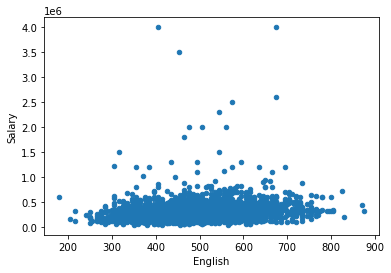

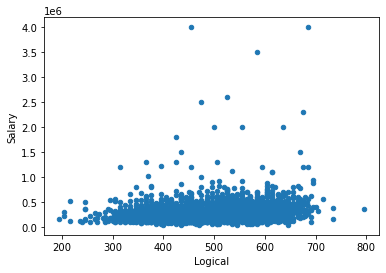

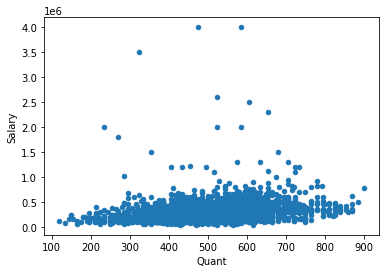

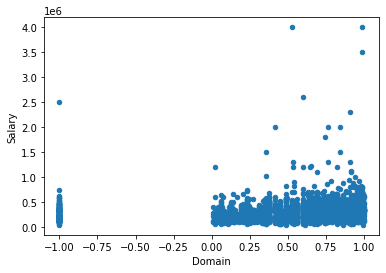

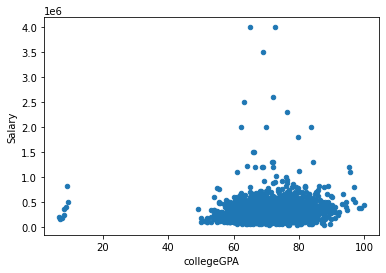

In [45]:
df.plot(kind = 'scatter', x = 'English' , y = 'Salary')
df.plot(kind = 'scatter', x = 'Logical', y = 'Salary')
df.plot(kind = 'scatter', x = 'Quant', y = 'Salary')
df.plot(kind = 'scatter', x = 'Domain', y = 'Salary')
df.plot(kind = 'scatter', x = 'collegeGPA', y = 'Salary')


In [47]:
from sklearn.linear_model  import LogisticRegression

classifier = LogisticRegression(solver = 'lbfgs', max_iter = 1000)
classifier.fit(X_train,Y_train)
y_prediction = classifier.predict(X_test)
y_prediction[0:5]

array([325000, 325000, 180000, 300000, 180000], dtype=int64)

In [48]:
test_set_rmse = (np.sqrt(mean_squared_error(Y_test, y_prediction)))
test_set_r2 = r2_score(Y_test, y_prediction)

In [49]:
print(test_set_rmse)
print(test_set_r2)

147334.2288811395
-0.015305137153706738


In [19]:
#SVR 
from sklearn.svm import SVR
classifier = SVR(kernel = 'rbf')
classifier.fit(X_train,Y_train)

SVR()

In [27]:
y_pred = classifier.predict(X_test)
y_pred = scale.inverse_transform(y_pred)

ValueError: operands could not be broadcast together with shapes (600,) (5,) (600,) 

In [26]:
X1_grid = np.arange(min(X1), max(X1), 0.01)
X1_grid = X1_grid.reshape((len(X1_grid), 1))
plt.scatter(X1, Y, color = 'red')
plt.plot(X1_grid, classifier.predict(X1_grid), color = 'blue')
plt.title('True or False (SVR)')
plt.xlabel('Job')
plt.ylabel('Salary')
plt.show()

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [29]:
#Bayesian Regression

from sklearn.linear_model import BayesianRidge
classifier = BayesianRidge()
classifier.fit(X_train,Y_train)
y_prediction [0:5]

array([333001.8321128 , 404749.20727635, 302072.04224049, 314384.91639664,
       353129.78803395])

In [31]:
from sklearn.metrics import mean_squared_error, r2_score
test_set_rmse = (np.sqrt(mean_squared_error(Y_test, y_prediction)))
test_set_r2 = r2_score(Y_test, y_prediction)

In [63]:
print(test_set_rmse)
print(test_set_r2)

147334.2288811395
-0.015305137153706738


In [61]:
# Select 3 features for training and evaluation. 
X2 = df.iloc[:,17:19]

X2_train, X2_test, Y_train, Y_test = train_test_split(X2, Y, train_size=0.8 )

In [62]:
X2.head()

,English,Logical
0,650,665
1,440,435
2,485,475
3,675,620
4,575,495


In [57]:
# Scaling
scale = StandardScaler()
X2_train = scale.fit_transform(X2_train)
X2_test = scale.transform(X2_test)

In [60]:
classifier = LinearRegression()
classifier.fit(X_train, Y_train)
x_surf, y_surf = np.meshgrid(np.linspace(df.English.min(), df.English.max(), 100), np.linspace(df.Logical.min(), df.Logical.max(), 100))
onlyX2 = df({'English': 'Logical', x_surf.ravel(). 'Salary'})
y_prediction = classifier.predict(X_test)
y_prediction[0:2]
fittedY = np.array(y_prediction)
fittedY


array([298673.19217018, 296164.88479018, 306895.06055713, 303566.9438068 ,
       303705.55650701, 302273.96517909, 312258.42086485, 298696.55748559,
       308889.17866991, 297089.36018992, 303196.31386047, 295598.90930304,
       300148.51856628, 306380.42184818, 312097.44594149, 303768.93478617,
       300910.15442488, 298099.42319842, 299795.70831753, 304563.1339792 ,
       299337.74779481, 298062.06750637, 307646.37535034, 296536.37201302,
       302698.31348889, 300577.09872643, 302879.49333459, 308213.62744549,
       311217.9428899 , 311312.13167228, 307849.9231302 , 311179.71137261,
       311564.47786128, 296490.53152712, 303021.58809671, 303562.76968735,
       299122.07737516, 300848.75208886, 299502.46735059, 307857.67064624,
       302738.14399429, 308859.4040329 , 305529.96241798, 306992.1882019 ,
       298490.9158691 , 300260.09102253, 302966.43008334, 309299.51693197,
       301178.94216049, 312525.92722383, 309374.29021784, 315275.03086582,
       306311.73528793, 3